In [1]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
series = np.sin((0.1*np.arange(400))**2)

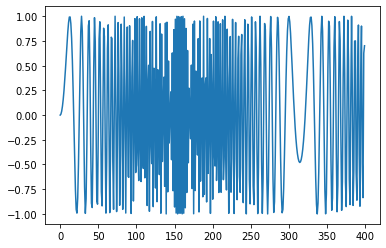

In [3]:
plt.plot(series)
plt.show()

In [4]:
T=10
D=1
X,Y=[],[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print('X.shape = ',X.shape,'Y.shape',Y.shape)

X.shape =  (390, 10) Y.shape (390,)


In [5]:
X=X.reshape(-1,T,1)
i=Input(shape=(T,D))
x=SimpleRNN(10,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.02))

r=model.fit(X[:-N//2],Y[:-N//2] ,batch_size=32, epochs=200 , validation_data=(X[-N//2:], Y[-N//2:]))


Epoch 1/200
7/7 [==============================] - 1s 88ms/step - loss: 0.5702 - val_loss: 0.5299
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 0.4635 - val_loss: 0.4956
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4315 - val_loss: 0.4988
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3798 - val_loss: 0.4788
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3696 - val_loss: 0.4797
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 0.3477 - val_loss: 0.4636
Epoch 7/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3631 - val_loss: 0.4861
Epoch 8/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3467 - val_loss: 0.4330
Epoch 9/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2989 - val_loss: 0.4085
Epoch 10/200
7/7 [==============================] - ETA: 0s - loss: 0.254 - 0s 11ms/step - loss: 0.3058 - val_loss: 0.

7/7 [==============================] - 0s 17ms/step - loss: 0.0664 - val_loss: 0.1346
Epoch 84/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0652 - val_loss: 0.2247
Epoch 85/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1615 - val_loss: 0.3510
Epoch 86/200
7/7 [==============================] - 0s 11ms/step - loss: 0.1242 - val_loss: 0.1606
Epoch 87/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0996 - val_loss: 0.1595
Epoch 88/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0866 - val_loss: 0.1295
Epoch 89/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0765 - val_loss: 0.1356
Epoch 90/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0651 - val_loss: 0.1168
Epoch 91/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0704 - val_loss: 0.1216
Epoch 92/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0630 - val_loss: 0.1675
Epoch 93/200
7/7 [=====

7/7 [==============================] - 0s 13ms/step - loss: 0.0177 - val_loss: 0.0681
Epoch 166/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0166 - val_loss: 0.0908
Epoch 167/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0197 - val_loss: 0.0694
Epoch 168/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0152 - val_loss: 0.0939
Epoch 169/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0188 - val_loss: 0.0600
Epoch 170/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0256 - val_loss: 0.0993
Epoch 171/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0240 - val_loss: 0.0727
Epoch 172/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0342 - val_loss: 0.1748
Epoch 173/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0472 - val_loss: 0.0536
Epoch 174/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0424 - val_loss: 0.1123
Epoch 175/200


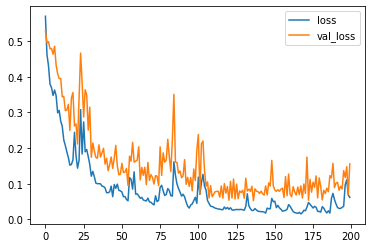

In [6]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(390, 1)


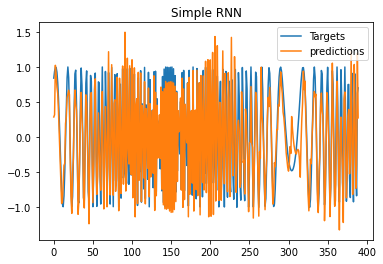

In [7]:
outputs=model.predict(X)
print(outputs.shape)
predictions=outputs[:,0]

plt.plot(Y,label='Targets')
plt.plot(predictions,label='predictions')
plt.title('Simple RNN')
plt.legend()
plt.show()

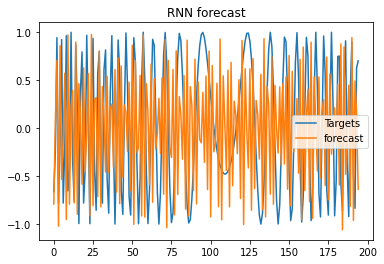

In [8]:
forecast=[]
input_=X[-N//2]
while len(forecast)<len(Y[-N//2:]):
    f=model.predict(input_.reshape(1,T,1))[0,0]
    forecast.append(f)
    input_=np.roll(input_,-1)
    input_[-1]=f

plt.plot(Y[N//2:],label='Targets')
plt.plot(forecast,label='forecast')
plt.title('RNN forecast')
plt.legend()
plt.show()